In [2]:
# !pip install altair

In [3]:
# !python -m pip install --upgrade pip

In [4]:
import altair as alt

In [5]:
# !pip install vega_datasets

In [6]:
from vega_datasets import data
import altair as alt
import pandas as pd

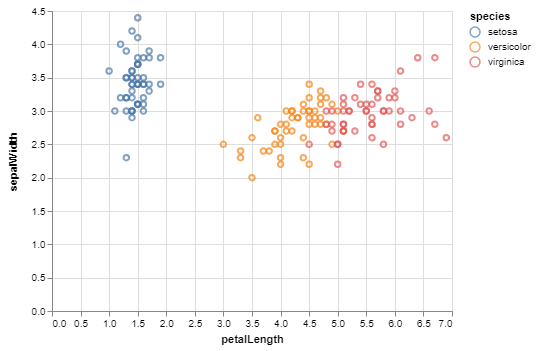

In [16]:
iris=data.iris()
alt.Chart(data=iris).mark_point().encode(
    x='petalLength',
    y='sepalWidth',
    color='species'
).interactive()

In [20]:
cars=data.cars()
cars.dtypes

Acceleration               float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Miles_per_Gallon           float64
Name                        object
Origin                      object
Weight_in_lbs                int64
Year                datetime64[ns]
dtype: object

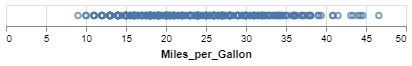

In [22]:
alt.Chart(data=cars).mark_point().encode(
x='Miles_per_Gallon'
)

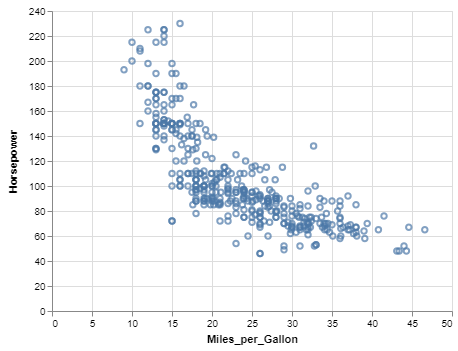

In [26]:
alt.Chart(data=cars).mark_point().encode(
x='Miles_per_Gallon',
    y='Horsepower'
).interactive()

In [28]:
# # Json file format 
# alt.Chart(data=cars).mark_point().encode(
# x='Miles_per_Gallon',
#     y='Horsepower'
# ).interactive().to_dict()

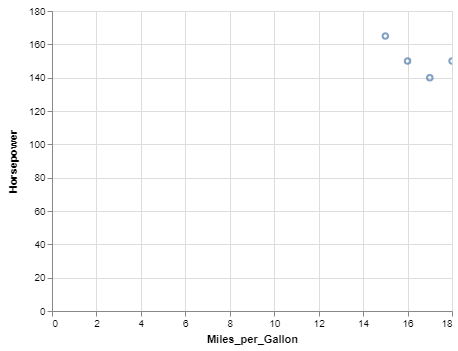

In [45]:
# To visualize few particular point
cars1=cars.iloc[1:5,]
alt.Chart(data=cars1).mark_point().encode(
x='Miles_per_Gallon',
    y='Horsepower'
).interactive()


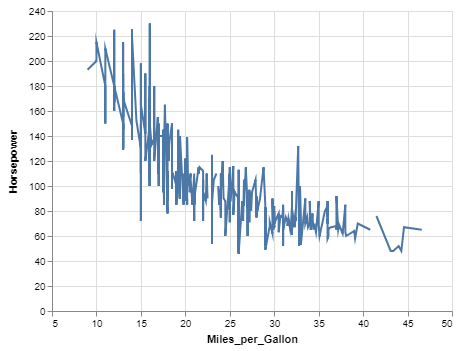

In [50]:
alt.Chart(data=cars).mark_line().encode(
x='Miles_per_Gallon',
    y='Horsepower'
).interactive()

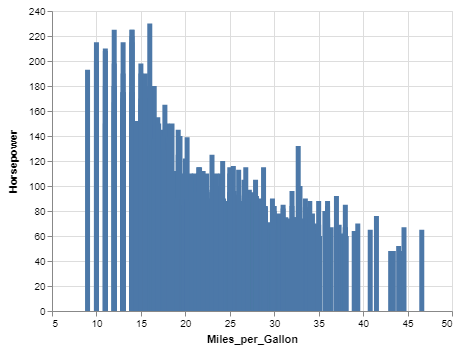

In [51]:
alt.Chart(data=cars).mark_bar().encode(
x='Miles_per_Gallon',
    y='Horsepower'
).interactive()

In [52]:
cars.dtypes

Acceleration               float64
Cylinders                    int64
Displacement               float64
Horsepower                 float64
Miles_per_Gallon           float64
Name                        object
Origin                      object
Weight_in_lbs                int64
Year                datetime64[ns]
dtype: object

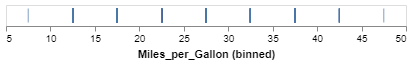

In [54]:
alt.Chart(cars).mark_tick().encode(
x=alt.X('Miles_per_Gallon',bin=True),
)

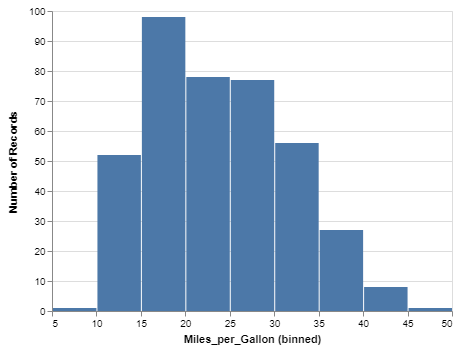

In [57]:
alt.Chart(cars).mark_bar().encode(
x=alt.X('Miles_per_Gallon',bin=True),
y='count()'
)

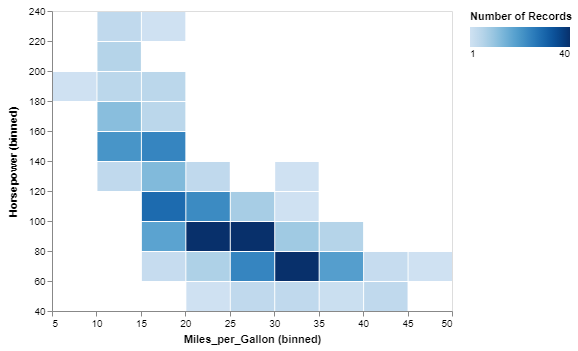

In [59]:
alt.Chart(cars).mark_bar().encode(
x=alt.X('Miles_per_Gallon',bin=True),
    y=alt.Y('Horsepower',bin=True),
color='count()'
)

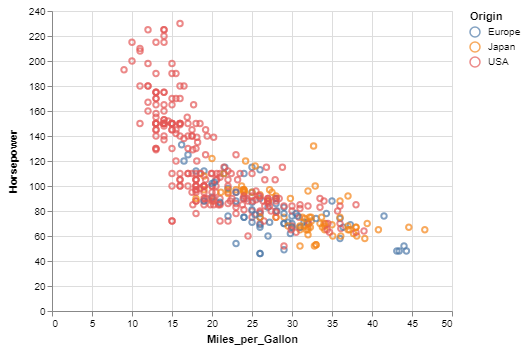

In [62]:
alt.Chart(data=cars).mark_point().encode(
x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).interactive()

In [63]:
# Grammer of Interaction that allows you to build interactive features of the plot from these sorts of components.

In [65]:
# Interval Selection added to the chart.
# Here we can click and drag and create a selected interval and move around.

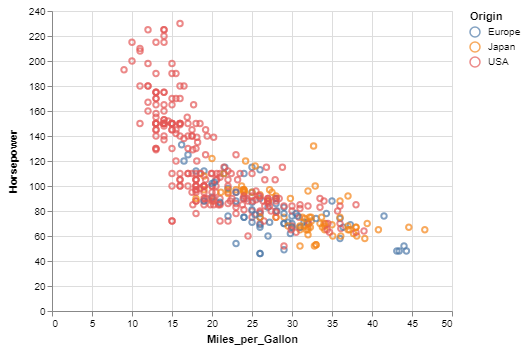

In [66]:
interval=alt.selection_interval()
# This is an e.g of interval selection in 2 d
alt.Chart(data=cars).mark_point().encode(
x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).properties(selection=interval)
# Add some properties to the chart 

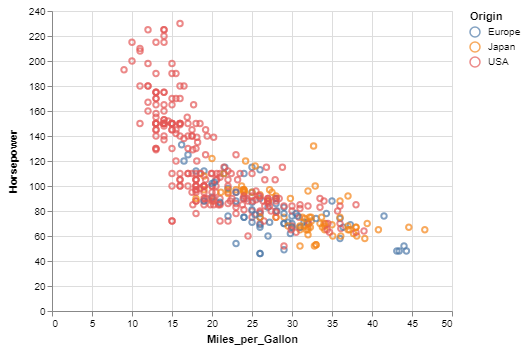

In [68]:
interval=alt.selection_interval(encodings=['x'])
# This is an e.g of interval selection in 1d along x
alt.Chart(data=cars).mark_point().encode(
x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).properties(selection=interval)
# Add some properties to the chart 

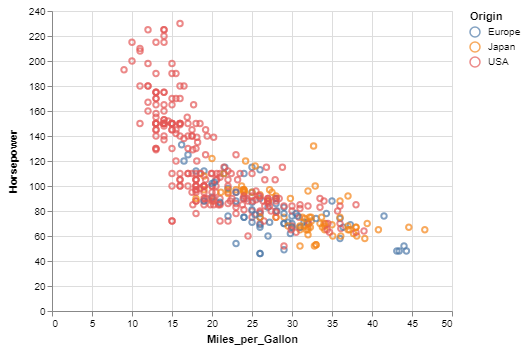

In [69]:
interval=alt.selection_interval(encodings=['y'])
# This is an e.g of interval selection in 1d along y
alt.Chart(data=cars).mark_point().encode(
x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).properties(selection=interval)
# Add some properties to the chart 

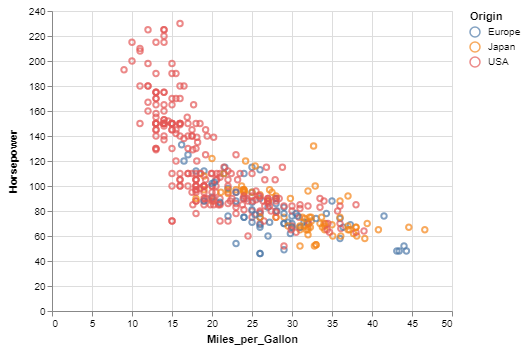

In [71]:
interval=alt.selection_interval(encodings=['x','y'])
# This is an e.g of interval selection in 2d
alt.Chart(data=cars).mark_point().encode(
x='Miles_per_Gallon',
    y='Horsepower',
    color='Origin'
).properties(selection=interval)
# Add some properties to the chart 

In [72]:
# Everytime we move these around there is a signal happening in render that says the selection has been changed and these are the current points
# in the selection

In [73]:
# Start making properties of chart conditional on the selection . i.e Lets say color to be conditional on the interval
# If its inside the interval we want the color to reflect as origin  , If its outside the color should have a grayscale value

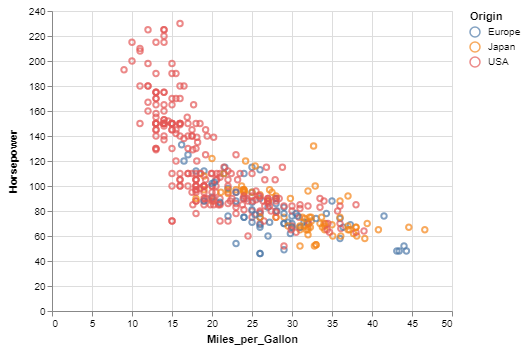

In [82]:
interval=alt.selection_interval()

alt.Chart(data=cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval,'Origin',alt.value('lightgray'))
).properties(selection=interval)
# Add some properties to the chart 

In [83]:
# For Multipanel charts

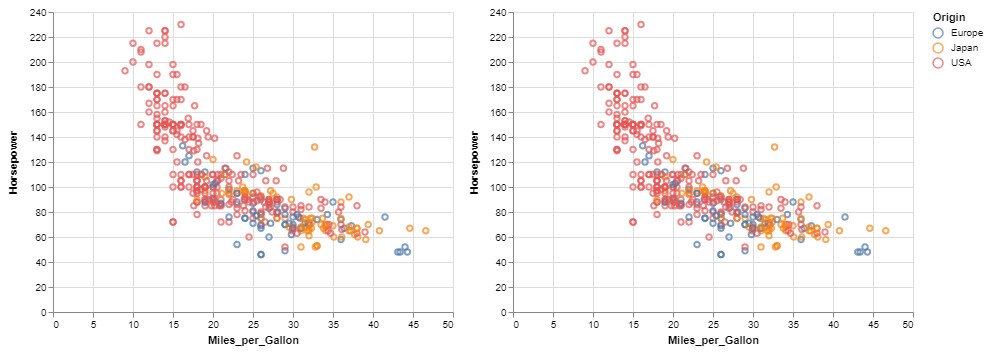

In [85]:
interval=alt.selection_interval()

chart=alt.Chart(data=cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval,'Origin',alt.value('lightgray'))
).properties(selection=interval)
# Add some properties to the chart 

chart | chart

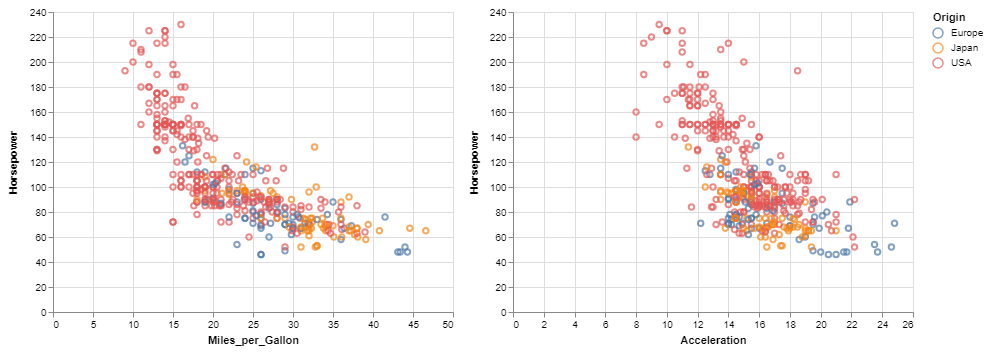

In [88]:
# We can make some interesting visualisation on the 2nd chart 
interval=alt.selection_interval()

chart=alt.Chart(data=cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval,'Origin',alt.value('lightgray'))
).properties(selection=interval)
# Add some properties to the chart 

chart | chart.encode(x='Acceleration')
# We can see how these are related

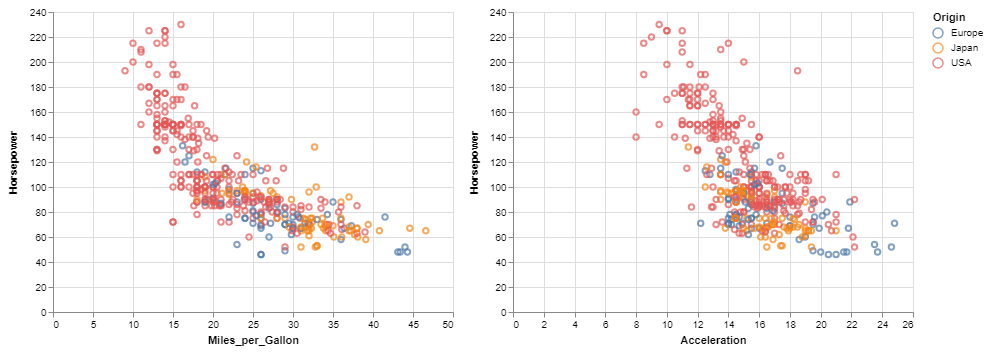

In [90]:
# We can make some interesting visualisation on the 2nd chart 
interval=alt.selection_interval(encodings=['x'])

chart=alt.Chart(data=cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval,'Origin',alt.value('lightgray'))
).properties(selection=interval)
# Add some properties to the chart 

chart | chart.encode(x='Acceleration')
# We can see how these are related

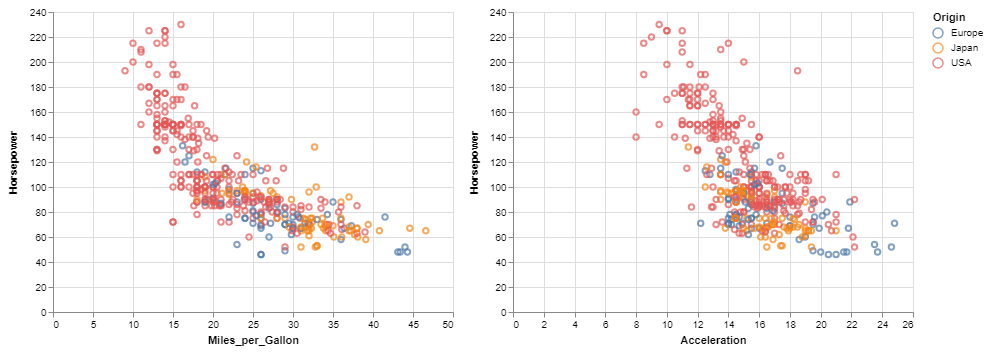

In [93]:
# We can make some interesting visualisation on the 2nd chart 
interval=alt.selection_interval()

chart=alt.Chart(data=cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval,'Origin',alt.value('lightgray')),
    tooltip='Name'
).properties(selection=interval)
# Add some properties to the chart 
# tooltip , to get the name of the car by clicking on the points
chart | chart.encode(x='Acceleration')
# We can see how these are related

In [99]:
# We can make some interesting visualisation on the 2nd chart 
interval=alt.selection_interval()

chart=alt.Chart(data=cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval,'Origin',alt.value('lightgray')),
    tooltip='Name'
).properties(selection=interval)
# Add some properties to the chart 
# tooltip , to get the name of the car by clicking on the points
(chart | chart.encode(x='Acceleration')).save('great_work.html')
# We can see how these are related

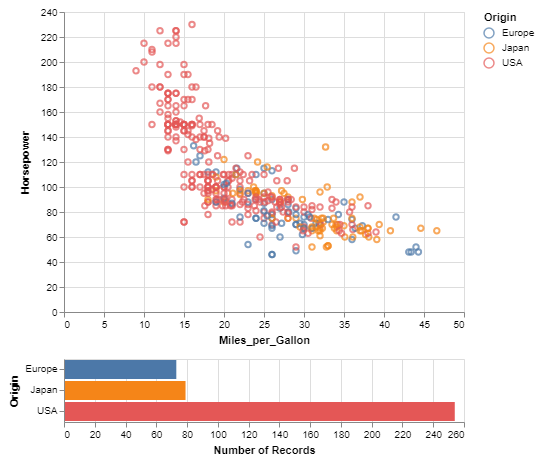

In [106]:
interval=alt.selection_interval(encodings=['x'])
chart=alt.Chart(data=cars).mark_point().encode(
    x='Miles_per_Gallon',
    y='Horsepower',
    color=alt.condition(interval,'Origin',alt.value('lightgray')),
    tooltip='Name'
).properties(selection=interval)

hist=alt.Chart(cars).mark_bar().encode(
x='count()',
y='Origin',
color='Origin').transform_filter(interval)

# chart & hist
alt.vconcat(chart,hist)

In [107]:
# We ae filtering te data shown in lower chart by the content o fthe selection in uper chart

In [108]:
# alt.renderers.enable('notebook')
# alt.renderers.enable('collab')